In [6]:
import torch as t
import math
import numpy as np

FRAME_TIME = 0.1  # time interval
GRAVITY_ACCEL = 0.12  # gravity constant
BOOST_ACCEL = 0.18  # thrust constant
ROTATION_ACCEL = np.radians(20)  # rotation constant

action = t.tensor([0.1, 0.8])
state = t.tensor([7., 6., 5., 4., 3., 2.])

delta_state_ori = ROTATION_ACCEL* FRAME_TIME*t.tensor([0., -1, 0., 0., 0., 0.])

cos = t.matmul(t.tensor([[0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [-1., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.]]),t.cos(state))
sin = t.matmul(t.tensor([[0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [0., 0., 0., 0., 0., 0.],
                         [1., 0., 0., 0., 0., 0.]]),t.sin(state))
cos_sin = cos+sin
delta_state_pos = BOOST_ACCEL* FRAME_TIME*t.tensor([0., 0., 0., 1., 0., 1.])*cos_sin # x and y components of acceleration

delta_state_combine = delta_state_ori + delta_state_pos

action_mat = t.tensor([[0., 0.],
                 [2., 0.],
                 [0., 0.],
                 [0., 1.],
                 [0., 0.],
                 [0., 1.]])
a_a = t.matmul(action_mat, action) + t.tensor([0., -1., 0., 0., 0., 0.]) # get ori and pos accelerations
print(a_a)

delta_state = delta_state_combine*a_a

state_gravity = GRAVITY_ACCEL * FRAME_TIME*t.tensor([0., 0., 0., 1., 0., 0.])
state = state + delta_state + state_gravity

step_mat = t.tensor([[1., FRAME_TIME, 0., 0., 0., 0.],
                     [0., 1., 0., 0., 0., 0.],
                     [0., 0., 1., FRAME_TIME, 0., 0.],
                     [0., 0., 0., 1., 0., 0.],
                     [0., 0., 0., 0., 1., FRAME_TIME,],
                     [0., 0., 0., 0., 0., 1.],])
state = t.matmul(step_mat, state)

print(state)


tensor([ 0.0000, -0.8000,  0.0000,  0.8000,  0.0000,  0.8000])
tensor([7.6028, 6.0279, 5.4001, 4.0011, 3.2009, 2.0095])


In [74]:
(state[4]*(1 / (1 + math.exp(4*(abs(state[4])-0.25)))))**2

2

In [77]:
a = [7., 6., 5., 4., 3., 2.]
b = [7., 0., 9., 4., 6., 1.]
c = (a,b)
print(c[1])

[7.0, 0.0, 9.0, 4.0, 6.0, 1.0]


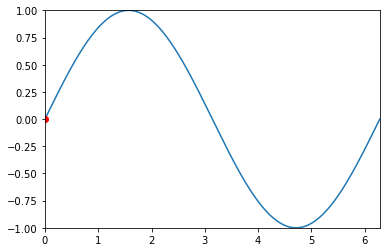

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()

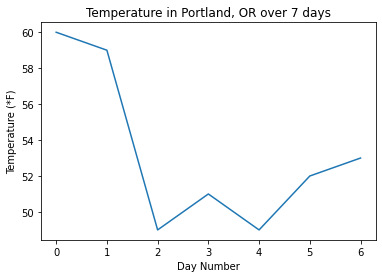

In [99]:
# import necessary packages
import matplotlib.pyplot as plt

# data
data_lst = [60, 59, 49, 51, 49, 52, 53]

# create the figure and axis objects
fig, ax = plt.subplots()

# plot the data and customize
ax.plot(data_lst)
ax.set_xlabel('Day Number')
ax.set_ylabel('Temperature (*F)')
ax.set_title('Temperature in Portland, OR over 7 days')

# save and show the plot
fig.savefig('static_plot.png')
plt.show()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\xiang\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\xiang\anaconda3\lib\tkinter\__init__.py", line 814, in callit
    func(*args)
  File "C:\Users\xiang\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\xiang\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\xiang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\xiang\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x0000024AC5989160>
Exception in Tkinter callback
Traceba

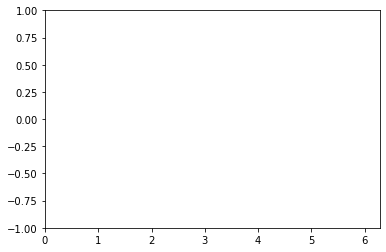

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()